In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os

In [2]:
dataset = pd.read_csv("/Users/geethika/Desktop/heart.csv")
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Calculate distance between two points

def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Test the function

minkowski_distance(a=predictors.iloc[0], b=predictors.iloc[1], p=1)

100.2

In [5]:
# Define an arbitrary test point

test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X

distances = []

for i in predictors.index:
    
    distances.append(minkowski_distance(test_pt, predictors.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=predictors.index, columns=['dist'])
df_dists.head()

,dist
0,204.7
1,163.7
2,169.7
3,173.7
4,176.7


In [6]:
# Find the 5 nearest neighbors

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
124,130.7
71,141.7
84,143.7
30,144.7
87,144.7


In [7]:
from collections import Counter

# Create counter object to track the labels

counter = Counter(target[df_nn.index])

# Get most common label of all the nearest neighbors

counter.most_common()[0][0]

1

In [8]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, Y_train, Y_test, k=12, p=1)

print(y_hat_test)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [9]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, y_hat_test)*100)

91.80327868852459


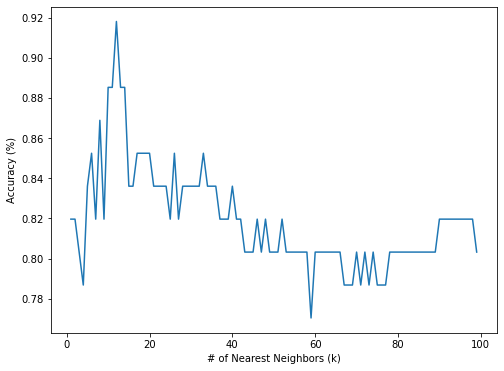

In [10]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, Y_train, Y_test, k, p=1)
    accuracies.append(accuracy_score(Y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');